In [1]:
!pip install pandas

DEPRECATION: Loading egg at c:\users\vinay\anaconda3\lib\site-packages\diamondpriceprediction-0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [10]:
import pandas as pd

df = pd.read_csv('BIKE DETAILS.csv')

In [5]:
data.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [8]:
data.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [9]:
# Impute the null values with the mean
data.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [12]:
mean_value = data['ex_showroom_price'].mean()

data['ex_showroom_price'].fillna(mean_value, inplace = True)

C:\Users\vinay\AppData\Local\Temp\ipykernel_15016\3072882054.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ex_showroom_price'].fillna(mean_value, inplace = True)


In [13]:
data

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,87958.714058
1,Honda Dio,45000,2017,Individual,1st owner,5650,87958.714058
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.000000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.000000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,87958.714058
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.000000
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.000000
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.000000
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.000000


In [17]:
bike_categories = data['name'].unique()
bike_categories

array(['Royal Enfield Classic 350', 'Honda Dio',
       'Royal Enfield Classic Gunmetal Grey',
       'Yamaha Fazer FI V 2.0 [2016-2018]', 'Yamaha SZ [2013-2014]',
       'Honda CB Twister', 'Honda CB Hornet 160R',
       'Royal Enfield Bullet 350 [2007-2011]', 'Hero Honda CBZ extreme',
       'Bajaj Discover 125', 'Yamaha FZ16', 'Honda Navi',
       'Bajaj Avenger Street 220', 'Yamaha YZF R3', 'Jawa 42',
       'Suzuki Access 125 [2007-2016]', 'Hero Honda Glamour',
       'Yamaha YZF R15 S', 'Yamaha FZ25', 'Hero Passion Pro 110',
       'Honda Navi [2016-2017]', 'Honda Activa i', 'Jawa Standard',
       'Royal Enfield Thunderbird 350', 'Honda Dream Yuga',
       'TVS Apache RTR 160 4V', 'Yamaha Fazer [2009-2016]',
       'Hero Honda Splendor NXG', 'Hero Glamour 125',
       'Yamaha FZ S [2012-2016]', 'Hero Xtreme Sports', 'Honda X-Blade',
       'Honda CB Shine SP', 'Honda Activa 5G', 'Honda CBR-250R',
       'Hero Honda Passion PRO [2012]', 'Bajaj Dominar 400',
       'Hero Glamour F

In [18]:
data['seller_type'].unique()

array(['Individual', 'Dealer'], dtype=object)

In [19]:
data.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [21]:
# Analyse the price of the bike by the bike name by the mean, min, max
bike_price_summary = data.groupby('name')['selling_price'].agg(['mean', 'min', 'max']).reset_index()
print(bike_price_summary)


                           name           mean     min     max
0                     Activa 3g   31000.000000   17000   45000
1                     Activa 4g   40000.000000   40000   40000
2                Aprilia SR 125   70000.000000   65000   75000
3                    BMW G310GS  300000.000000  300000  300000
4                 Bajaj  ct 100   18000.000000   18000   18000
..                          ...            ...     ...     ...
274            Yamaha YZF R15 S   70833.333333   40000   85000
275           Yamaha YZF R15 V3  145000.000000  120000  170000
276  Yamaha YZF R15 [2011-2018]   66666.666667   50000   80000
277               Yamaha YZF R3  365000.000000  365000  365000
278                    Yo Style   20000.000000   20000   20000

[279 rows x 4 columns]


In [23]:
# Analyse the bike price max 5 
print(bike_price_summary.sort_values(by='max', ascending=False).head())


                               name      mean     min     max
204                 Suzuki GSX S750  760000.0  760000  760000
57       Harley-Davidson Street Bob  750000.0  750000  750000
171  Kawasaki Ninja 650 [2018-2019]  362500.0  300000  425000
277                   Yamaha YZF R3  365000.0  365000  365000
56       Harley-Davidson Street 750  330000.0  330000  330000


In [24]:
df = data.groupby('name', as_index = False)['selling_price'].mean()

In [25]:
df

,name,selling_price
0,Activa 3g,31000.000000
1,Activa 4g,40000.000000
2,Aprilia SR 125,70000.000000
3,BMW G310GS,300000.000000
4,Bajaj ct 100,18000.000000
...,...,...
274,Yamaha YZF R15 S,70833.333333
275,Yamaha YZF R15 V3,145000.000000
276,Yamaha YZF R15 [2011-2018],66666.666667
277,Yamaha YZF R3,365000.000000


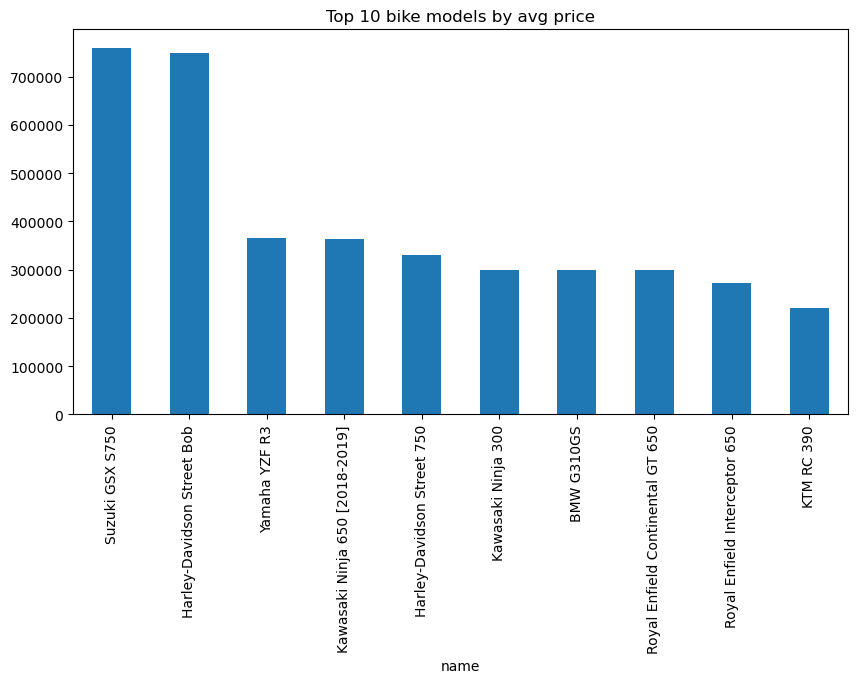

In [37]:
# Bar chart for the bike name vs avg price
import matplotlib.pyplot as plt
avg_price = df.groupby('name')['selling_price'].mean().sort_values(ascending = False).head(10)
avg_price.plot(kind='bar', figsize=(10,5), title='Top 10 bike models by avg price')
plt.show()

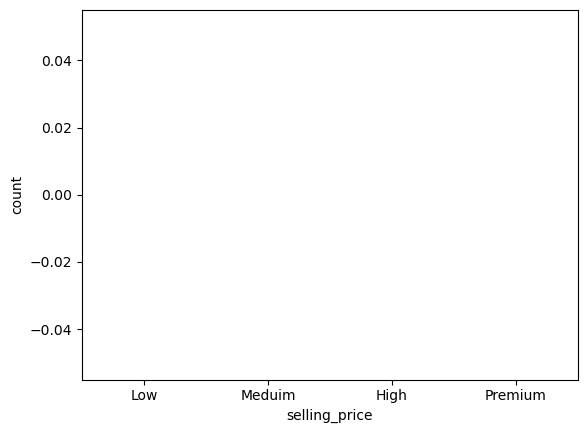

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='selling_price', data = df, order= ['Low', 'Meduim', 'High', 'Premium'])

plt.show()

In [42]:
data['seller_type'].unique()

array(['Individual', 'Dealer'], dtype=object)

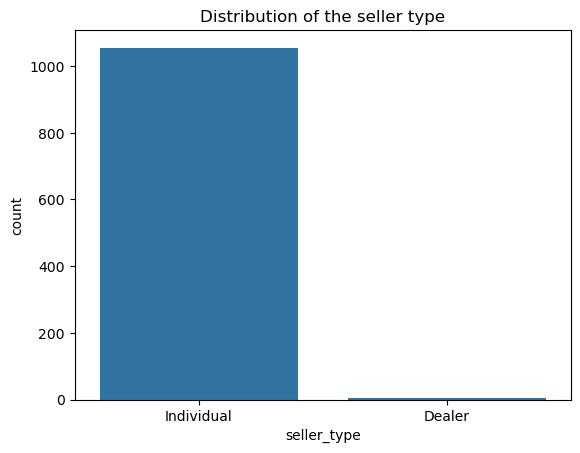

In [44]:
sns.countplot(x = 'seller_type', data=data)
plt.title("Distribution of the seller type")
plt.show()

In [ ]:
# The insight of the above is the 'Individuals are more in number as compared to dealer'.


In [45]:
data.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

<Axes: xlabel='selling_price', ylabel='Count'>

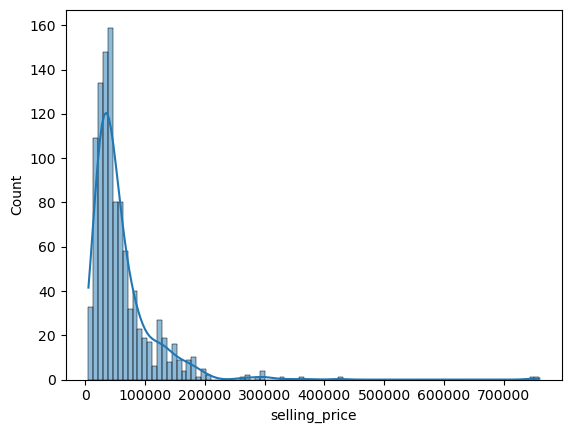

In [48]:
sns.histplot(data['selling_price'], kde =True)

In [50]:
data['bike_age'] = 2024 - data['year']


<Axes: xlabel='bike_age', ylabel='selling_price'>

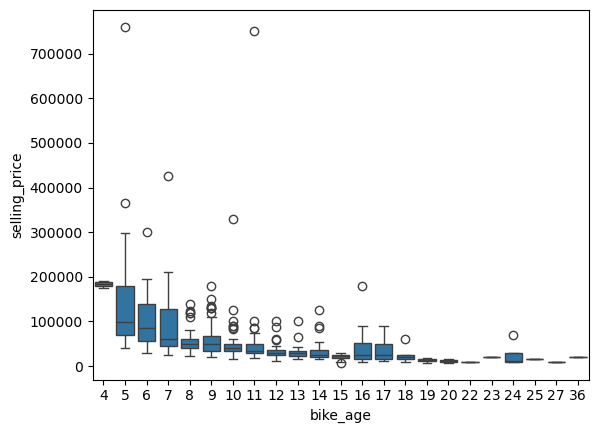

In [54]:
sns.boxplot(x='bike_age', y = 'selling_price', data = data.head(500))

In [ ]:
# Insight : as the age of the bike increases the the price of the bike decreases


<Axes: xlabel='km_driven', ylabel='selling_price'>

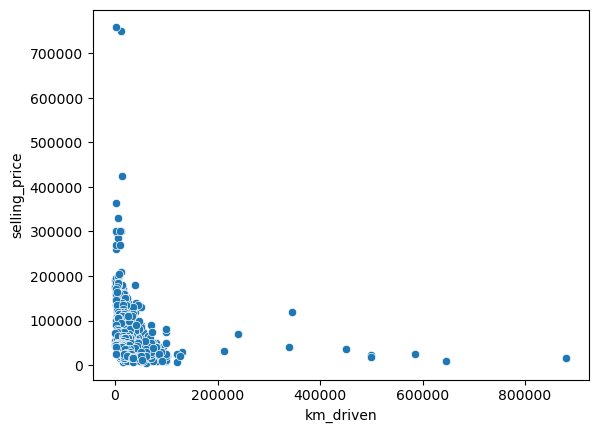

In [55]:
sns.scatterplot(x = 'km_driven', y = 'selling_price', data = data)

<Axes: >

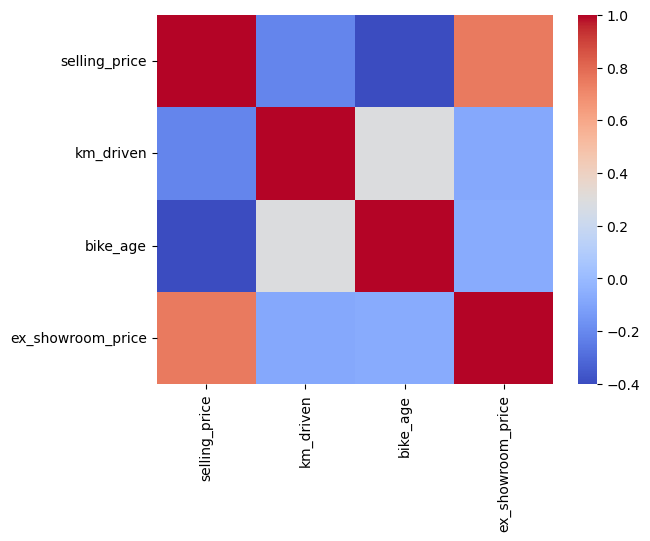

In [56]:
corr_matrix = data[['selling_price', 'km_driven', 'bike_age', 'ex_showroom_price']].corr()
sns.heatmap(corr_matrix, cmap ='coolwarm')

In [4]:
# 1. Range of Selling Prices
selling_price_range = (data["selling_price"].min(), data["selling_price"].max())
print(f"Range of selling prices: {selling_price_range}")


Range of selling prices: (5000, 760000)


In [5]:
# 2. Median Selling Price
median_selling_price = data["selling_price"].median()
print(f"Median selling price: {median_selling_price}")


Median selling price: 45000.0


In [7]:
# 3. Most Common Seller Type
common_seller = data["seller_type"].mode()[0]
print(f"Most common seller type: {common_seller}")


Most common seller type: Individual


In [8]:
# 4. Number of Bikes Driven More Than 50,000 km
bikes_above_50k = data[data["km_driven"] > 50000].shape[0]
print(f"Number of bikes driven more than 50,000 km: {bikes_above_50k}")


Number of bikes driven more than 50,000 km: 170


In [9]:
# 5. Average km_driven by Ownership Type
avg_km_by_owner = data.groupby("owner")["km_driven"].mean()
print(avg_km_by_owner)


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [11]:
# 6. Proportion of Bikes from 2015 or Older
prop_old_bikes = df[df["year"] <= 2015].shape[0] / df.shape[0]
print(f"Proportion of bikes from 2015 or older: {prop_old_bikes:.2%}")



Proportion of bikes from 2015 or older: 56.64%


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


NameError: name 'plt' is not defined

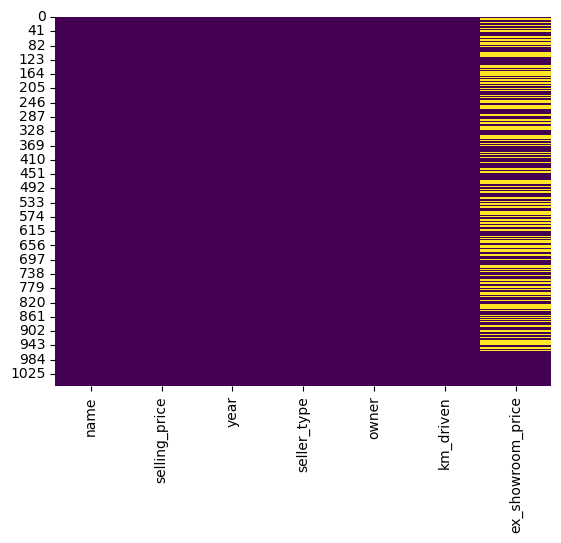

In [13]:
# 7. Missing Value Trend
import seaborn as sns
missing_values = df.isnull().sum()
print(missing_values)
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.show()


In [14]:
# 8. Highest Ex-Showroom Price & Corresponding Bike
max_ex_showroom_price = df["ex_showroom_price"].max()
bike_max_price = df[df["ex_showroom_price"] == max_ex_showroom_price]["name"].values[0]
print(f"Highest ex-showroom price: {max_ex_showroom_price}, Bike: {bike_max_price}")


Highest ex-showroom price: 1278000.0, Bike: Harley-Davidson Street Bob


In [15]:
# 9. Number of Bikes Listed by Each Seller Type
bikes_by_seller = df["seller_type"].value_counts()
print(bikes_by_seller)


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


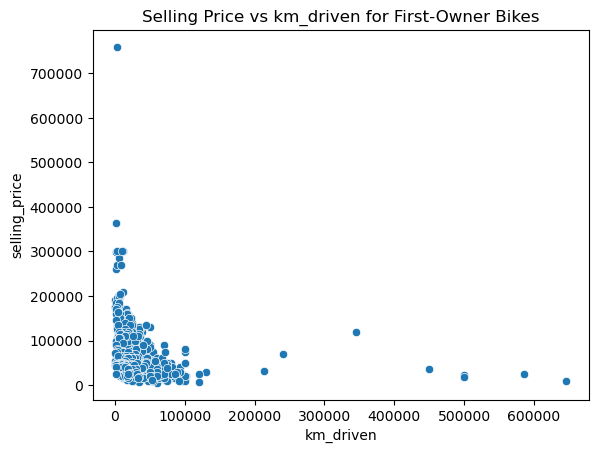

In [17]:
# 10. Relationship Between Selling Price & km_driven for First-Owner Bikes
import matplotlib.pyplot as plt
sns.scatterplot(data=df[df["owner"] == "1st owner"], x="km_driven", y="selling_price")
plt.title("Selling Price vs km_driven for First-Owner Bikes")
plt.show()


In [18]:
# 11. Remove Outliers in km_driven Using IQR
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[(df["km_driven"] >= (Q1 - 1.5 * IQR)) & (df["km_driven"] <= (Q3 + 1.5 * IQR))]
print(f"Original data: {df.shape[0]}, Filtered data: {df_filtered.shape[0]}")

Original data: 1061, Filtered data: 1022


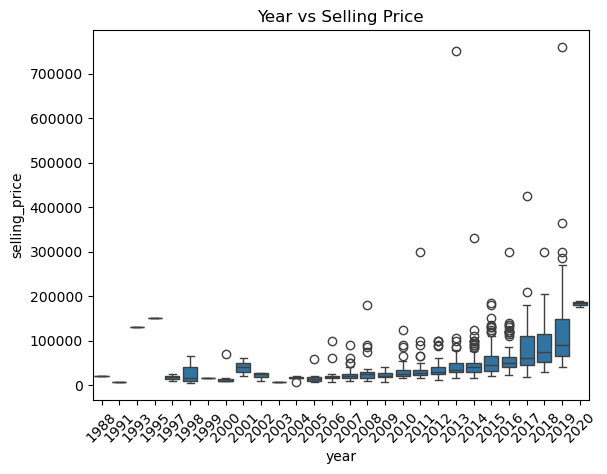

In [19]:
# 12. Bivariate Analysis: Year vs Selling Price
sns.boxplot(data=df, x="year", y="selling_price")
plt.xticks(rotation=45)
plt.title("Year vs Selling Price")
plt.show()

In [20]:
# 13. Average Depreciation in Selling Price
current_year = 2024
df["bike_age"] = current_year - df["year"]
avg_depreciation = df.groupby("bike_age")["selling_price"].mean()
print(avg_depreciation)

bike_age
4     183333.333333
5     119689.511628
6      87660.374046
7      78894.736842
8      58469.018692
9      56500.000000
10     48668.131868
11     51136.986301
12     35748.400000
13     35655.721311
14     31793.333333
15     22267.857143
16     34289.285714
17     24927.586207
18     23380.000000
19     16978.571429
20     15100.000000
21      8000.000000
22     20666.666667
23     40000.000000
24     20833.333333
25     15000.000000
26     28333.333333
27     17500.000000
29    150000.000000
31    130000.000000
33      6000.000000
36     20000.000000
Name: selling_price, dtype: float64


In [21]:
# 14. Bikes Priced Above the Average for Their Manufacturing Year
avg_price_by_year = df.groupby("year")["selling_price"].mean()
df_above_avg = df[df["selling_price"] > df["year"].map(avg_price_by_year)]
print(df_above_avg[["name", "year", "selling_price"]])


                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
...                                    ...   ...            ...
1004                  Bajaj Pulsar  NS 200  2016          60000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1012                   Bajaj Pulsar NS 200  2014          50000
1023                Bajaj Avenger 220 dtsi  2012          45000

[334 rows x 3 columns]


In [22]:
# 15. Correlation Matrix and Heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

ValueError: could not convert string to float: 'Royal Enfield Classic 350'